### Integrate and demonstrate processes and results across the program
#### 1.perform data analysis
#### 2..model training
#### 3.results visualization

#### Step 1: import src module and other module

In [10]:
from src.data_preprocessing import load_data, clean_data, split_data
from src.model import build_model
from src.training import train_model
from src.evaluation import evaluate_model
from src.visualization import plot_performance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.utils import to_categorical  # 更新导入路径

In [3]:
try:
    import keras
    print("Keras is installed and ready to use.")
except ImportError:
    print("Keras is not installed.")

Keras is installed and ready to use.


#### Step 2: data-preprocessing

In [29]:
file_path = 'data/dataset.csv'
data = load_data(file_path)
# data = clean_data(data)
# X_train, X_test, y_train, y_test = split_data(data)

##### Step 2.1: check dataset

In [30]:
# cols_to_convert = ['Channel', 'Region']
# for col in cols_to_convert:
#     data[col] = data[col].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [31]:
data.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [26]:
data = clean_data(data)

In [33]:
def split_data(data, target_column, categorical_columns):
    # 检查目标列和分类列是否存在于数据中
    missing_cols = [col for col in [target_column] + categorical_columns if col not in data.columns]
    if missing_cols:
        raise ValueError(f"Columns {missing_cols} are missing in the DataFrame")

    label_encoders = {}
    for col in categorical_columns:
        if col != target_column:
            label_encoder = LabelEncoder()
            data[col] = label_encoder.fit_transform(data[col])
            label_encoders[col] = label_encoder
    
    # 分离特征和目标变量
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    # 划分数据集为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, label_encoders

In [34]:
target_column = 'Region'  # predict Region
categorical_columns = ['Channel']   # 假设只有Channel是分类特征需要编码
X_train, X_test, y_train, y_test, label_encoders = split_data(data, target_column, categorical_columns)

In [50]:
X_train.head(1) , X_test.head(1), y_train.head(1), y_test.head(1), label_encoders

(     Channel  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
 266        1    572  9763    22182    2221              4882        2563,
      Channel  Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
 265        0   5909  23527    13699   10155               830        3636,
 266    1
 Name: Region, dtype: int64,
 265    1
 Name: Region, dtype: int64,
 {'Channel': LabelEncoder()})

#### Step 3: build a model

In [43]:
# 获取输入的维度（特征数量）
input_shape = X_train.shape[1]

# 确定类别的数量
num_classes = y_train.nunique()

# 因为我们正在做分类任务，所以我们需要对标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 建立模型
model = build_mlp_model(input_shape, num_classes=4)

# 检查模型的结构（适用于Keras模型）
model.summary()

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,540 (37.27 KB)

 Trainable params: 9,540 (37.27 KB)

 Non-trainable params: 0 (0.00 B)

#### Step 4: train a model

In [45]:
epochs = 100  # epoch
batch_size = 32  # batch size
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)

Epoch 1/100
11/11 - 2s - 219ms/step - accuracy: 0.2386 - loss: 3072.2617 - val_accuracy: 0.8182 - val_loss: 357.5608
Epoch 2/100
11/11 - 0s - 7ms/step - accuracy: 0.4688 - loss: 1494.4810 - val_accuracy: 0.8295 - val_loss: 445.4128
Epoch 3/100
11/11 - 0s - 7ms/step - accuracy: 0.5426 - loss: 1430.0598 - val_accuracy: 0.8182 - val_loss: 389.1109
Epoch 4/100
11/11 - 0s - 9ms/step - accuracy: 0.5540 - loss: 1247.5114 - val_accuracy: 0.8068 - val_loss: 278.5700
Epoch 5/100
11/11 - 0s - 8ms/step - accuracy: 0.4915 - loss: 835.1915 - val_accuracy: 0.8068 - val_loss: 241.3476
Epoch 6/100
11/11 - 0s - 9ms/step - accuracy: 0.5057 - loss: 826.0336 - val_accuracy: 0.8068 - val_loss: 219.5491
Epoch 7/100
11/11 - 0s - 9ms/step - accuracy: 0.5199 - loss: 819.4908 - val_accuracy: 0.7955 - val_loss: 182.0202
Epoch 8/100
11/11 - 0s - 9ms/step - accuracy: 0.4574 - loss: 812.6394 - val_accuracy: 0.8068 - val_loss: 141.6506
Epoch 9/100
11/11 - 0s - 9ms/step - accuracy: 0.4773 - loss: 773.3907 - val_accura

#### Step 5: analysis a model

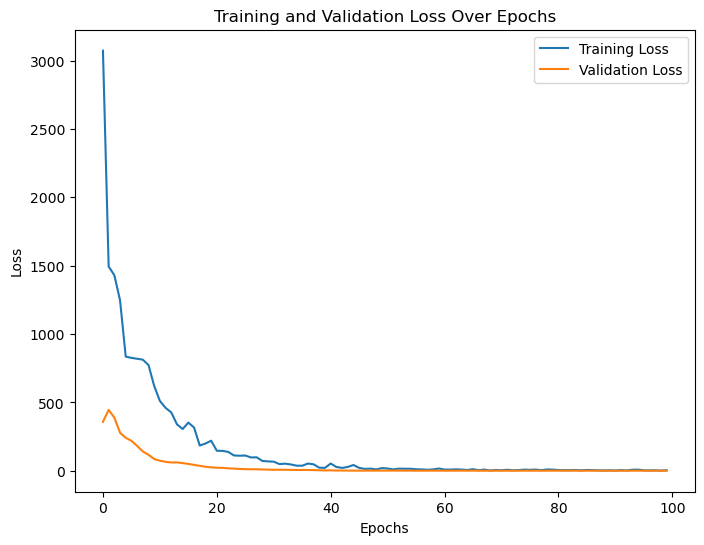

<Figure size 640x480 with 0 Axes>

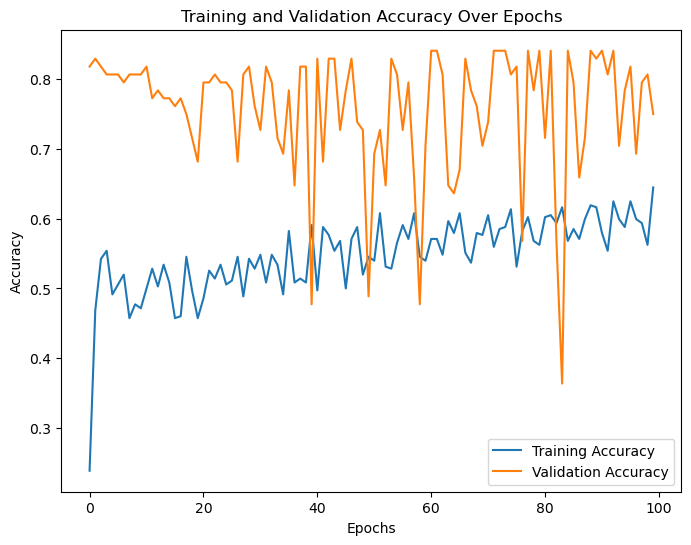

<Figure size 640x480 with 0 Axes>

In [47]:
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)

#### Step 6: evaluate a model

In [49]:
# 评估模型
evaluate_model(model, X_test, y_test_encoded)

# 如果你有多个评估指标，可以这样打印每个指标
# print(f"Accuracy on test set: {accuracy_score(y_test, model.predict(X_test))}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
              precision    recall  f1-score   support

           1       0.33      0.11      0.17         9
           2       0.00      0.00      0.00         5
           3       0.83      0.88      0.86        74

    accuracy                           0.75        88
   macro avg       0.39      0.33      0.34        88
weighted avg       0.73      0.75      0.74        88

Confusion Matrix:
[[ 1  0  8]
 [ 0  0  5]
 [ 2  7 65]]


#### Step 6: performance visualization

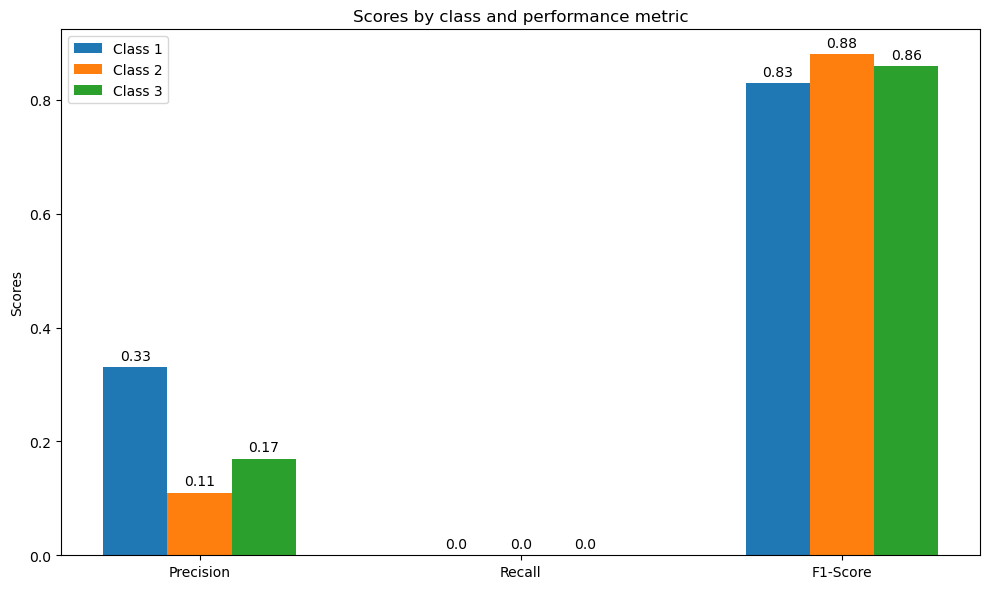

In [52]:
# 可视化性能指标
plot_performance(performance_data)

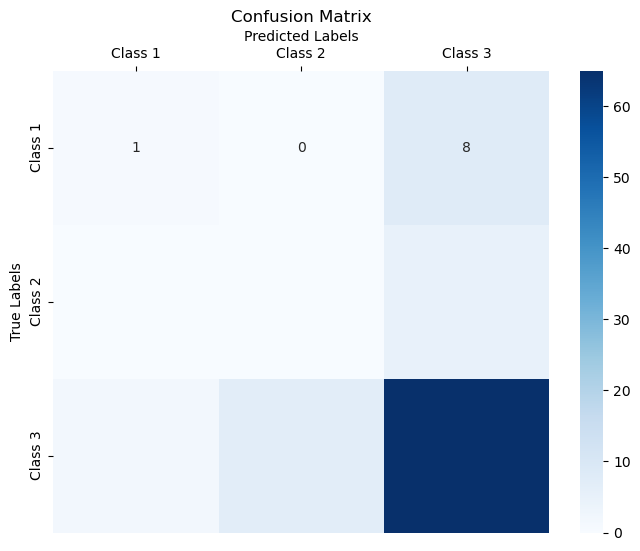

In [54]:
# 混淆矩阵的可视化
plot_confusion_matrix(confusion_matrix, class_names)

#### Step 7: module optimitic

##### Step 7.1: network layer adjustment

In [55]:
# 首先是模型调整一：增加新的隐藏层
def build_mlp_model_v1(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(128, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # New Hidden Layers
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# 获取输入的维度（特征数量）
input_shape = X_train.shape[1]

# 确定类别的数量
num_classes = y_train.nunique()

# 因为我们正在做分类任务，所以我们需要对标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 建立模型
model = build_mlp_model_v1(input_shape, num_classes=4)

# 检查模型的结构（适用于Keras模型）
model.summary()

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,052 (101.77 KB)

 Trainable params: 26,052 (101.77 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
epochs = 100  # epoch
batch_size = 32  # batch size
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)

Epoch 1/100
11/11 - 2s - 226ms/step - accuracy: 0.4006 - loss: 2435.3440 - val_accuracy: 0.8409 - val_loss: 244.6697
Epoch 2/100
11/11 - 0s - 11ms/step - accuracy: 0.5199 - loss: 1815.5715 - val_accuracy: 0.8409 - val_loss: 164.8861
Epoch 3/100
11/11 - 0s - 9ms/step - accuracy: 0.5114 - loss: 1202.6134 - val_accuracy: 0.7727 - val_loss: 111.3898
Epoch 4/100
11/11 - 0s - 9ms/step - accuracy: 0.4915 - loss: 1069.1460 - val_accuracy: 0.8295 - val_loss: 97.1271
Epoch 5/100
11/11 - 0s - 10ms/step - accuracy: 0.5199 - loss: 972.7803 - val_accuracy: 0.8295 - val_loss: 73.9872
Epoch 6/100
11/11 - 0s - 8ms/step - accuracy: 0.5114 - loss: 748.6313 - val_accuracy: 0.8182 - val_loss: 60.4470
Epoch 7/100
11/11 - 0s - 9ms/step - accuracy: 0.4830 - loss: 723.2587 - val_accuracy: 0.8068 - val_loss: 44.7087
Epoch 8/100
11/11 - 0s - 9ms/step - accuracy: 0.5142 - loss: 600.8570 - val_accuracy: 0.7727 - val_loss: 36.4682
Epoch 9/100
11/11 - 0s - 9ms/step - accuracy: 0.4972 - loss: 595.7010 - val_accuracy:

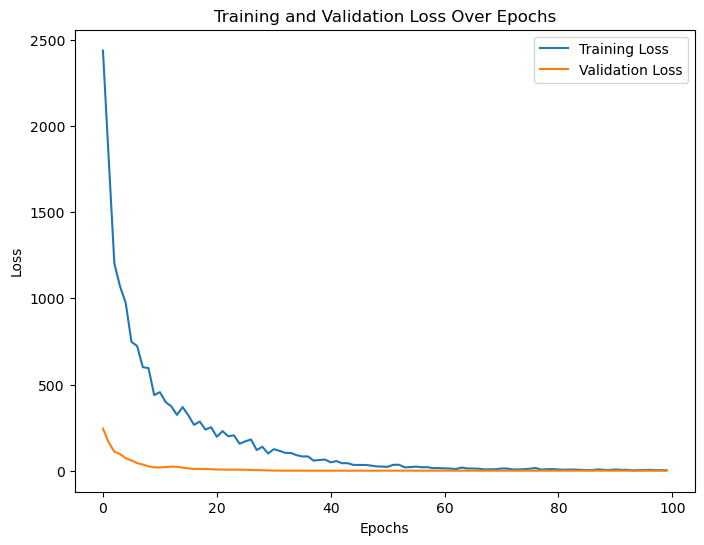

<Figure size 640x480 with 0 Axes>

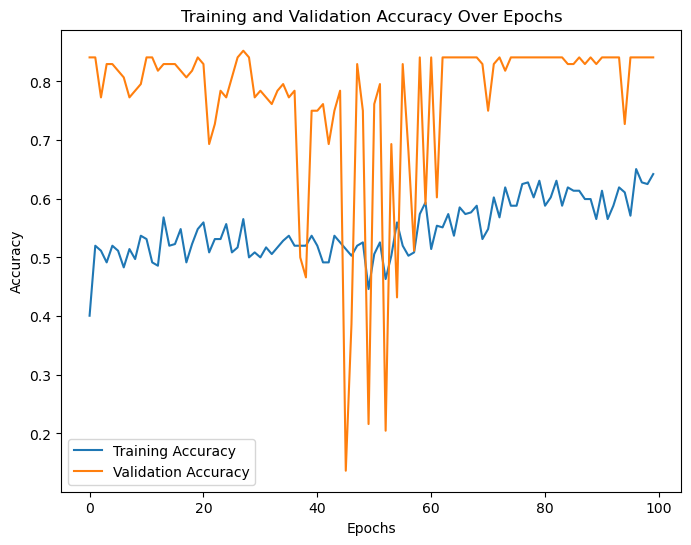

<Figure size 640x480 with 0 Axes>

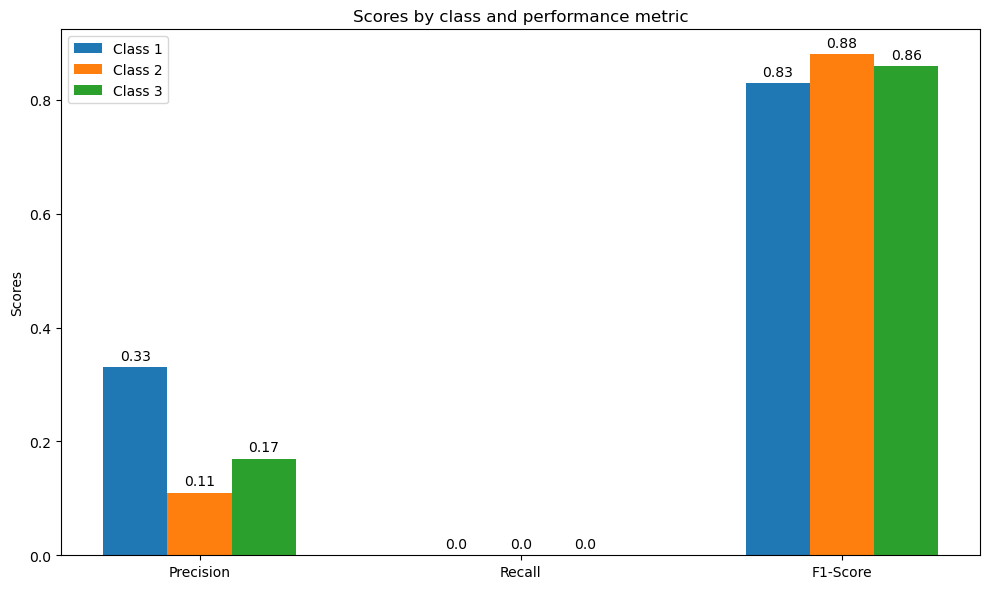

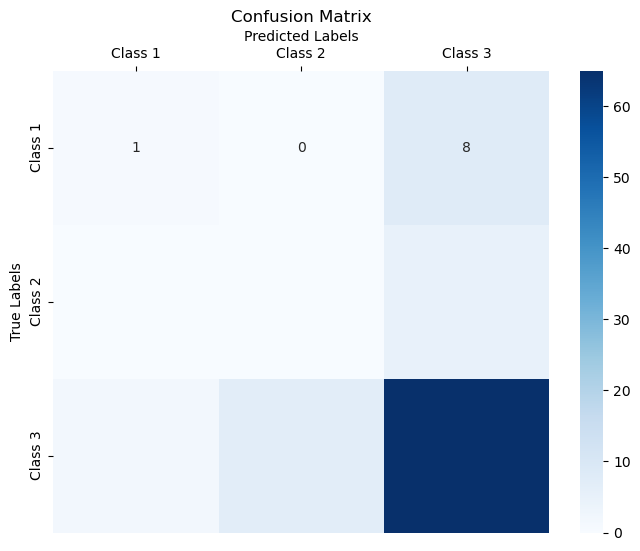

In [57]:
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)
# 可视化性能指标
plot_performance(performance_data)
# 混淆矩阵的可视化
plot_confusion_matrix(confusion_matrix, class_names)

In [58]:
# 首先是模型调整二：增加或减少现有隐藏层中的神经元数目
def build_mlp_model_v2(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))  # 增加到256个神经元
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))  # 这里也可以调整，例如尝试减少神经元数目
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# 获取输入的维度（特征数量）
input_shape = X_train.shape[1]

# 确定类别的数量
num_classes = y_train.nunique()

# 因为我们正在做分类任务，所以我们需要对标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 建立模型
model = build_mlp_model_v2(input_shape, num_classes=4)

# 检查模型的结构（适用于Keras模型）
model.summary()

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,756 (73.27 KB)

 Trainable params: 18,756 (73.27 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
epochs = 100  # epoch
batch_size = 32  # batch size
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)

Epoch 1/100
11/11 - 2s - 211ms/step - accuracy: 0.4773 - loss: 1712.0941 - val_accuracy: 0.8409 - val_loss: 356.5897
Epoch 2/100
11/11 - 0s - 9ms/step - accuracy: 0.5227 - loss: 1078.4136 - val_accuracy: 0.7614 - val_loss: 262.6245
Epoch 3/100
11/11 - 0s - 10ms/step - accuracy: 0.5199 - loss: 910.7261 - val_accuracy: 0.7841 - val_loss: 224.1834
Epoch 4/100
11/11 - 0s - 9ms/step - accuracy: 0.5455 - loss: 669.3466 - val_accuracy: 0.7727 - val_loss: 159.0911
Epoch 5/100
11/11 - 0s - 10ms/step - accuracy: 0.5284 - loss: 670.2803 - val_accuracy: 0.7955 - val_loss: 115.0096
Epoch 6/100
11/11 - 0s - 15ms/step - accuracy: 0.5227 - loss: 400.0978 - val_accuracy: 0.6705 - val_loss: 81.6242
Epoch 7/100
11/11 - 0s - 9ms/step - accuracy: 0.5284 - loss: 385.9847 - val_accuracy: 0.5455 - val_loss: 72.4706
Epoch 8/100
11/11 - 0s - 9ms/step - accuracy: 0.5170 - loss: 299.1459 - val_accuracy: 0.4886 - val_loss: 56.7816
Epoch 9/100
11/11 - 0s - 10ms/step - accuracy: 0.4972 - loss: 244.1477 - val_accurac

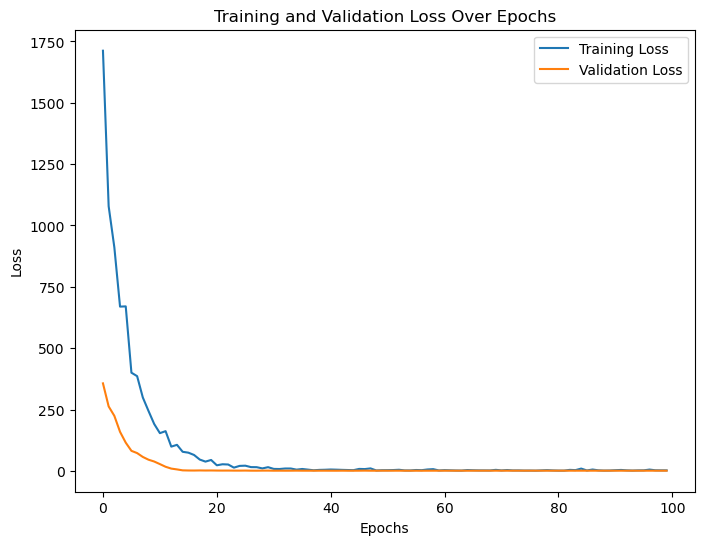

<Figure size 640x480 with 0 Axes>

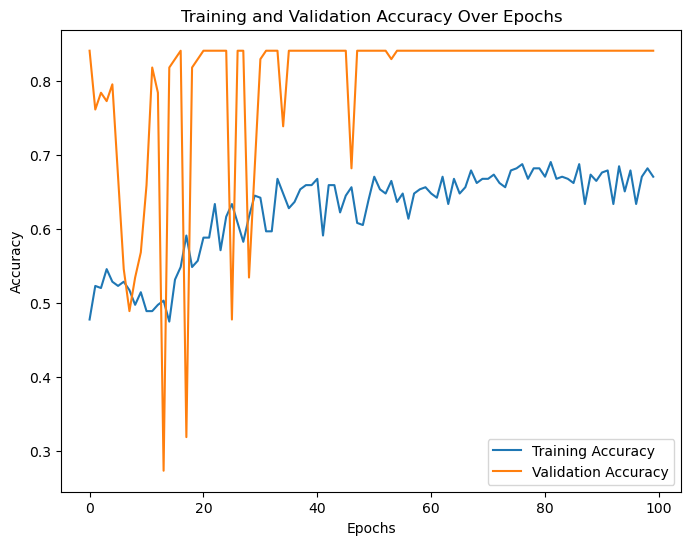

<Figure size 640x480 with 0 Axes>

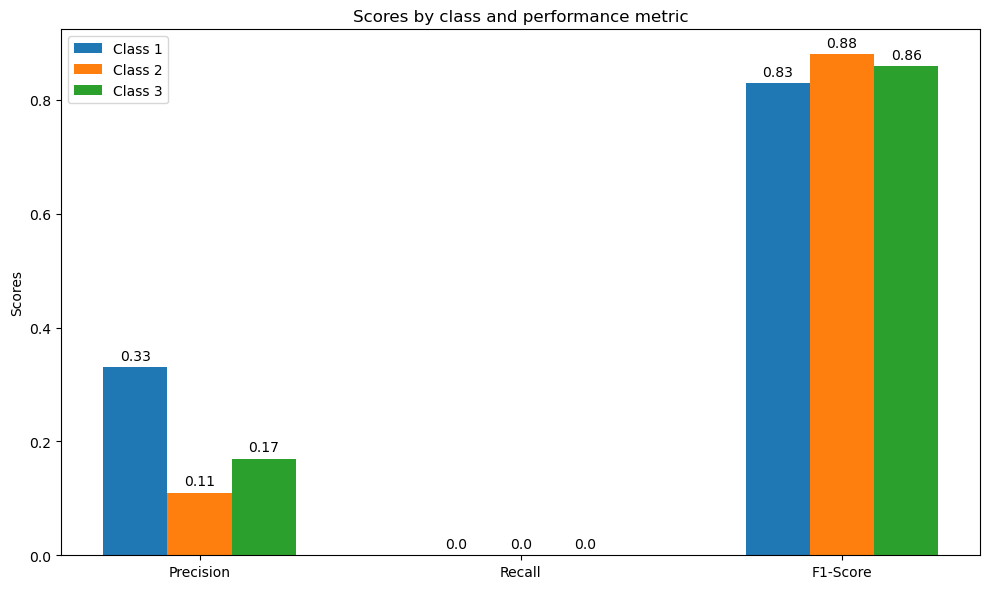

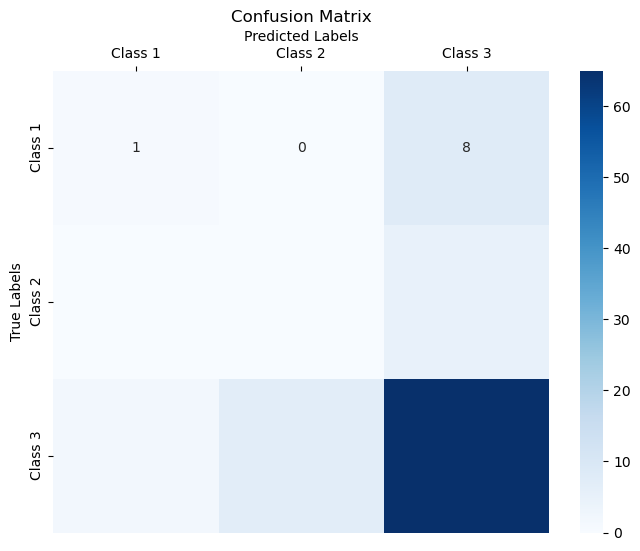

In [60]:
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)
# 可视化性能指标
plot_performance(performance_data)
# 混淆矩阵的可视化
plot_confusion_matrix(confusion_matrix, class_names)

In [61]:
# 首先是模型调整三：同时增加隐藏层的数量和调整神经元数目
def build_mlp_model_v3(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 新增的隐藏层
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 维持较高的神经元数目
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


# 获取输入的维度（特征数量）
input_shape = X_train.shape[1]

# 确定类别的数量
num_classes = y_train.nunique()

# 因为我们正在做分类任务，所以我们需要对标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 建立模型
model = build_mlp_model_v3(input_shape, num_classes=4)

# 检查模型的结构（适用于Keras模型）
model.summary()

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
epochs = 100  # epoch
batch_size = 32  # batch size
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)

Epoch 1/100
11/11 - 3s - 247ms/step - accuracy: 0.4716 - loss: 1623.2285 - val_accuracy: 0.8409 - val_loss: 339.8901
Epoch 2/100
11/11 - 0s - 11ms/step - accuracy: 0.5455 - loss: 1070.9948 - val_accuracy: 0.8409 - val_loss: 172.2025
Epoch 3/100
11/11 - 0s - 10ms/step - accuracy: 0.4886 - loss: 837.0228 - val_accuracy: 0.8182 - val_loss: 71.1914
Epoch 4/100
11/11 - 0s - 7ms/step - accuracy: 0.4489 - loss: 767.7713 - val_accuracy: 0.8182 - val_loss: 77.5261
Epoch 5/100
11/11 - 0s - 8ms/step - accuracy: 0.5369 - loss: 527.9144 - val_accuracy: 0.8182 - val_loss: 72.8261
Epoch 6/100
11/11 - 0s - 10ms/step - accuracy: 0.5398 - loss: 502.7553 - val_accuracy: 0.8409 - val_loss: 56.0849
Epoch 7/100
11/11 - 0s - 10ms/step - accuracy: 0.5028 - loss: 404.0909 - val_accuracy: 0.8409 - val_loss: 53.2556
Epoch 8/100
11/11 - 0s - 11ms/step - accuracy: 0.5966 - loss: 328.8345 - val_accuracy: 0.8409 - val_loss: 52.4216
Epoch 9/100
11/11 - 0s - 9ms/step - accuracy: 0.5511 - loss: 326.1567 - val_accuracy:

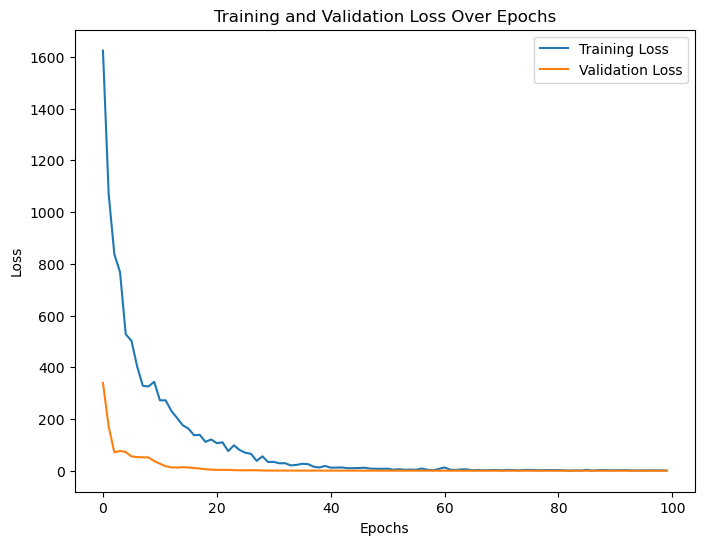

<Figure size 640x480 with 0 Axes>

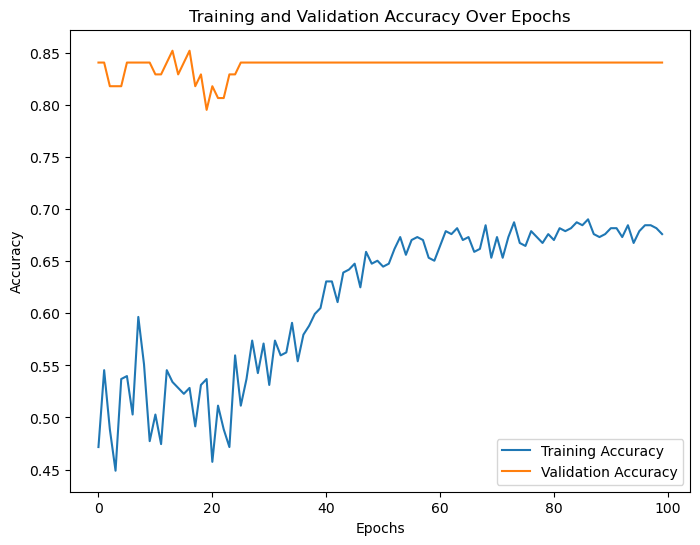

<Figure size 640x480 with 0 Axes>

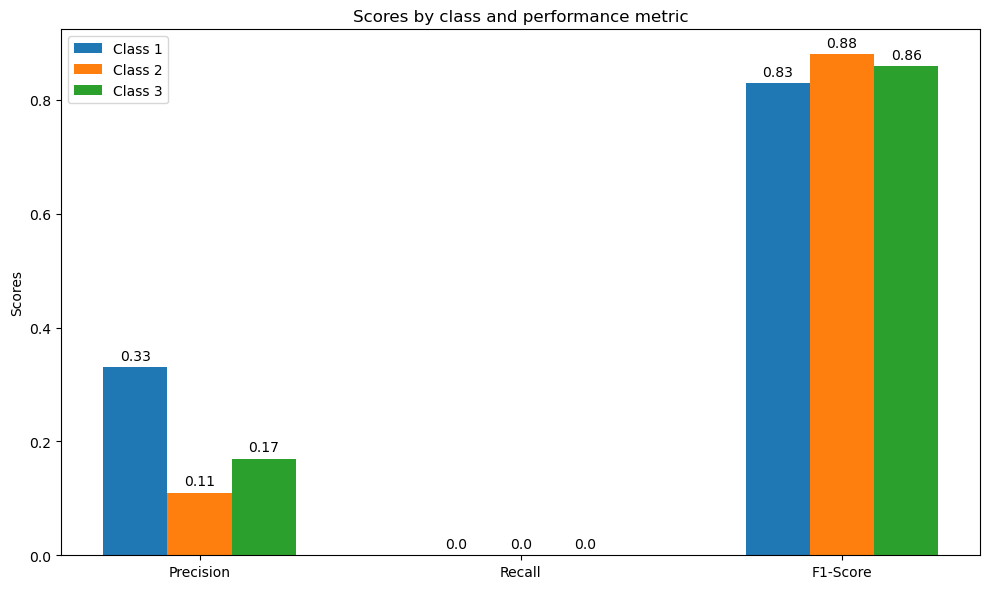

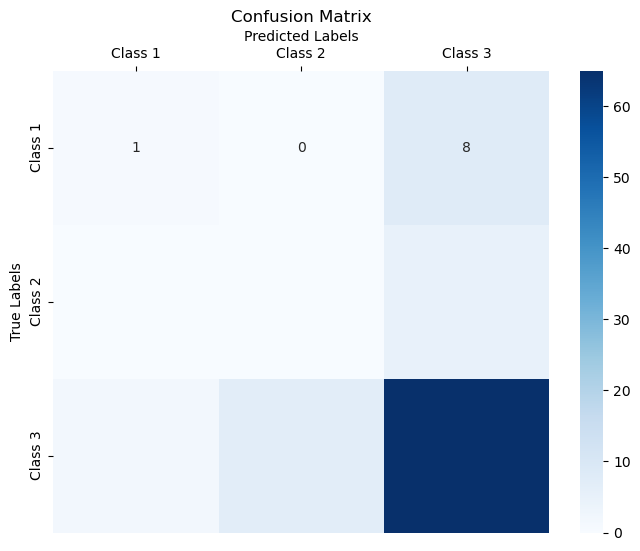

In [63]:
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)
# 可视化性能指标
plot_performance(performance_data)
# 混淆矩阵的可视化
plot_confusion_matrix(confusion_matrix, class_names)

##### Step7.2  Learning rate and optimizer tuning

In [67]:
# 1.优化器调整之一：学习率大小
# 设置优化器，这里使用Adam，并设置一个初始学习率
from tensorflow.keras.optimizers import Adam
def build_mlp_model_v3(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 新增的隐藏层
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 维持较高的神经元数目
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer,                       # 这里设置一个初始化的学习率【由原来的adam改为 Adam(learning_rate=0.001)】
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [65]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

# 学习率调度器函数
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.9  # 每个epoch学习率衰减10%

# 使用 ReduceLROnPlateau 自动降低学习率
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)  # 为模型训练做准备

In [71]:
def train_model(model, X_train, y_train_encoded, X_val, y_val_encoded, epochs, batch_size):
    # 可以在这里添加一个模型检查点，以保存训练过程中表现最好的模型
    # （可选）保存模型
    # checkpoint = ModelCheckpoint('results/best_model.h5', monitor='val_loss', save_best_only=True)
    checkpoint = ModelCheckpoint('results/best_model_1.keras', monitor='val_loss', save_best_only=True)         # 最新版本
    # 训练模型
    history = model.fit(
        X_train, y_train_encoded,
        validation_data=(X_test, y_test_encoded),
        epochs=100,
        batch_size=64,
        callbacks=[LearningRateScheduler(lr_schedule), reduce_lr],  # 添加学习率调整
        verbose=2
    )
    return model, history

In [68]:
# 获取输入的维度（特征数量）
input_shape = X_train.shape[1]

# 确定类别的数量
num_classes = y_train.nunique()

# 因为我们正在做分类任务，所以我们需要对标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 建立模型
model = build_mlp_model_v3(input_shape, num_classes=4)

# 检查模型的结构（适用于Keras模型）
model.summary()

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

In [72]:
# epochs = 100  # epoch
# batch_size = 32  # batch size
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)

Epoch 1/100
6/6 - 0s - 23ms/step - accuracy: 0.5284 - loss: 232.8305 - val_accuracy: 0.7727 - val_loss: 20.6442 - learning_rate: 7.6177e-08
Epoch 2/100
6/6 - 0s - 16ms/step - accuracy: 0.5540 - loss: 192.0838 - val_accuracy: 0.7727 - val_loss: 20.6437 - learning_rate: 7.6177e-08
Epoch 3/100
6/6 - 0s - 15ms/step - accuracy: 0.5142 - loss: 220.8449 - val_accuracy: 0.7727 - val_loss: 20.6434 - learning_rate: 7.6177e-08
Epoch 4/100
6/6 - 0s - 12ms/step - accuracy: 0.5199 - loss: 208.2823 - val_accuracy: 0.7727 - val_loss: 20.6431 - learning_rate: 7.6177e-08
Epoch 5/100
6/6 - 0s - 12ms/step - accuracy: 0.5455 - loss: 186.4501 - val_accuracy: 0.7727 - val_loss: 20.6428 - learning_rate: 7.6177e-08
Epoch 6/100
6/6 - 0s - 13ms/step - accuracy: 0.5028 - loss: 213.8935 - val_accuracy: 0.7727 - val_loss: 20.6428 - learning_rate: 7.6177e-08
Epoch 7/100
6/6 - 0s - 12ms/step - accuracy: 0.5170 - loss: 205.9940 - val_accuracy: 0.7727 - val_loss: 20.6425 - learning_rate: 7.6177e-08
Epoch 8/100
6/6 - 0s

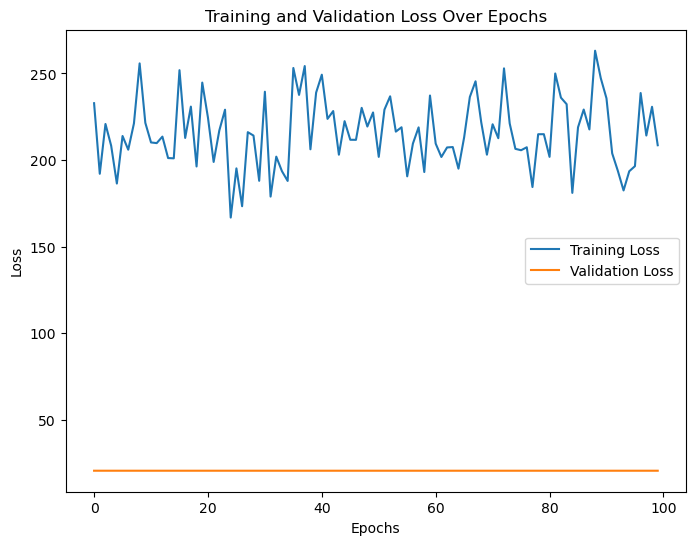

<Figure size 640x480 with 0 Axes>

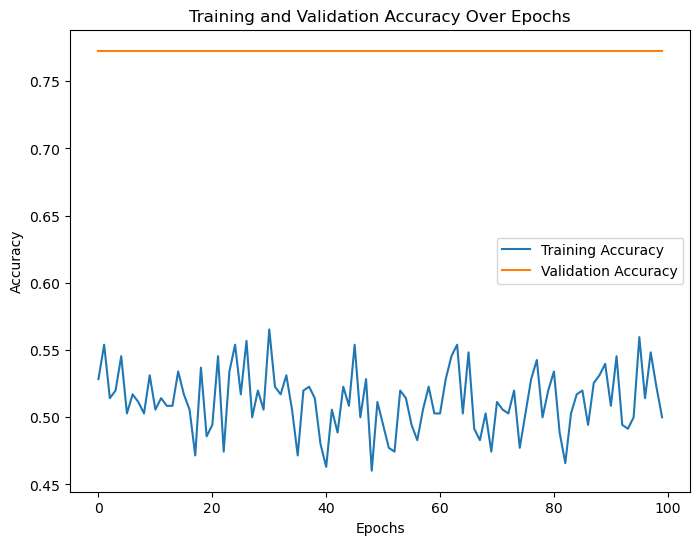

<Figure size 640x480 with 0 Axes>

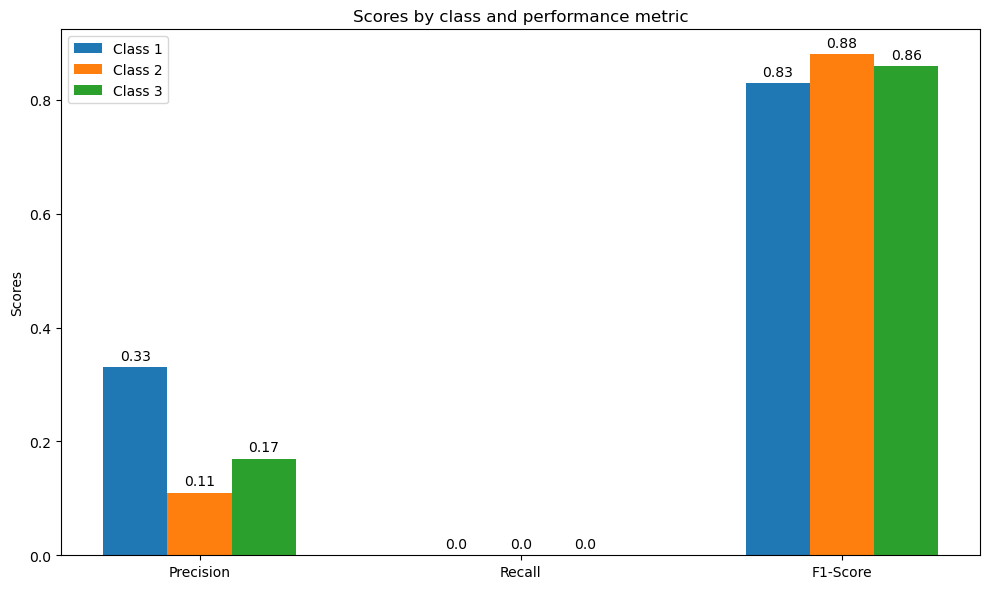

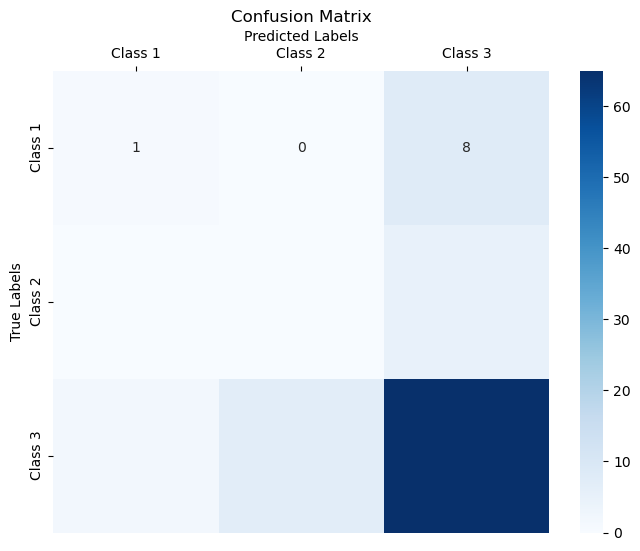

In [75]:
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)
# evaluate_model(model, X_test, y_test_encoded)

# 可视化性能指标
plot_performance(performance_data)
# 混淆矩阵的可视化
plot_confusion_matrix(confusion_matrix, class_names)

In [76]:
# 2.优化器调整之一：SGD大小【优化器调整，是在model.py文件中，模型编译这里优化的】
# 和学习率一样，使用相同的tarining脚本
from tensorflow.keras.optimizers import SGD

def build_mlp_model_v3(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 新增的隐藏层
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 维持较高的神经元数目
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)         # 使用具有动量的SGD优化器
    model.compile(optimizer=optimizer_sgd,                       # 这里设置一个初始化的学习率【由原来的adam改为optimizer_sgd】
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [77]:
# 获取输入的维度（特征数量）
input_shape = X_train.shape[1]

# 确定类别的数量
num_classes = y_train.nunique()

# 因为我们正在做分类任务，所以我们需要对标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 建立模型
model = build_mlp_model_v3(input_shape, num_classes=4)

# 检查模型的结构（适用于Keras模型）
model.summary()

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)

Epoch 1/100
6/6 - 2s - 309ms/step - accuracy: 0.2614 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 2/100
6/6 - 0s - 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 3/100
6/6 - 0s - 13ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 4/100
6/6 - 0s - 12ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 5/100
6/6 - 0s - 14ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 6/100
6/6 - 0s - 12ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 7/100
6/6 - 0s - 13ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 8/100
6/6 - 0s - 13ms/step - accuracy: 0.0000e+00 - 

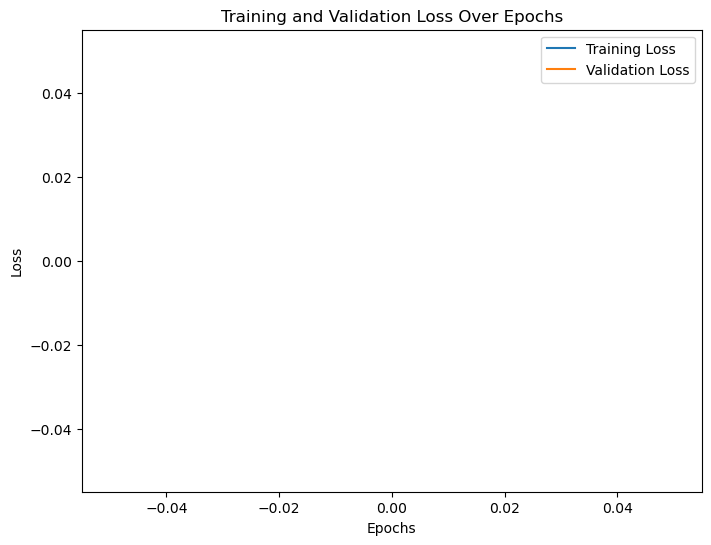

<Figure size 640x480 with 0 Axes>

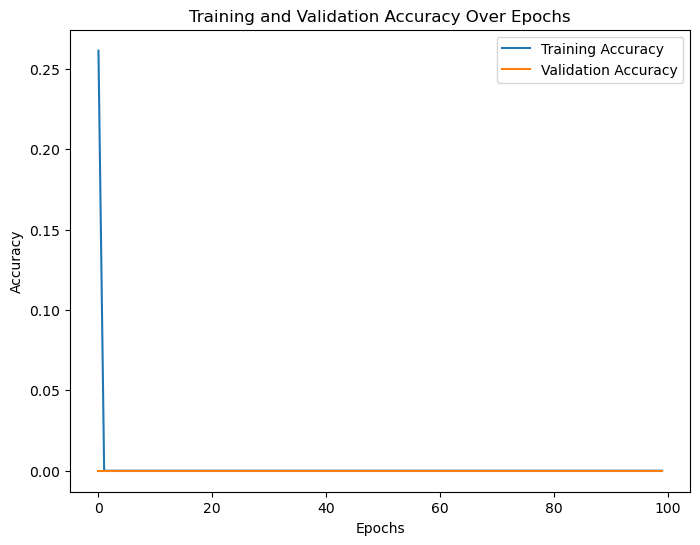

<Figure size 640x480 with 0 Axes>

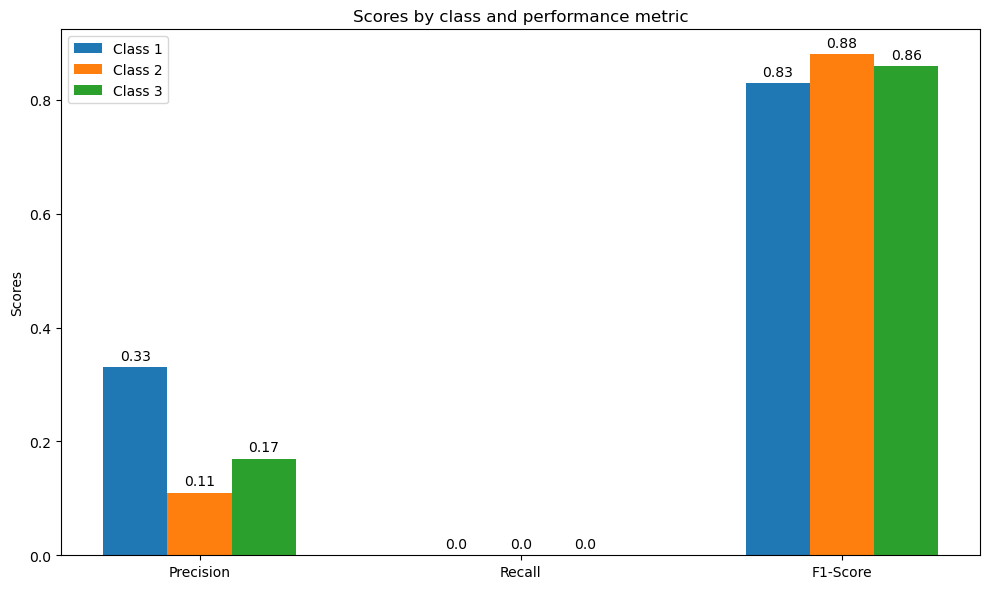

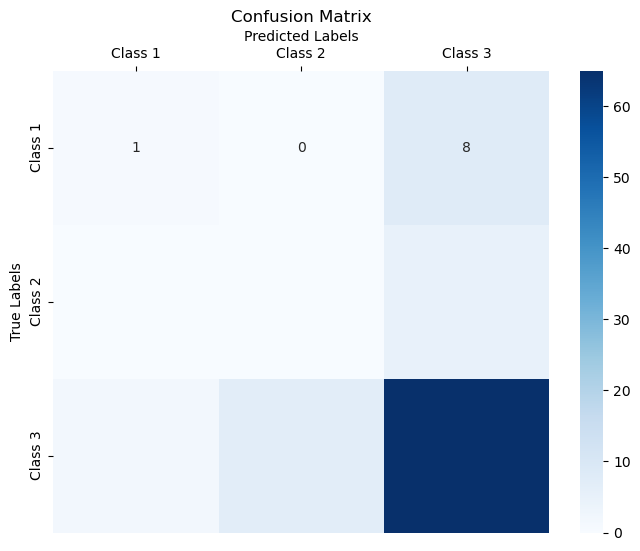

In [79]:
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)
# evaluate_model(model, X_test, y_test_encoded)

# 可视化性能指标
plot_performance(performance_data)
# 混淆矩阵的可视化
plot_confusion_matrix(confusion_matrix, class_names)

In [80]:
# 2.优化器调整之一：RMSprop优化器
# 和学习率一样，使用相同的tarining脚本
from tensorflow.keras.optimizers import RMSprop

def build_mlp_model_v3(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 新增的隐藏层
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 维持较高的神经元数目
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer_rmsprop = RMSprop(learning_rate=0.001)         # 使用具有动量的RMSprop优化器
    model.compile(optimizer=optimizer_rmsprop,                       # 这里设置一个初始化的学习率【由原来的adam改为optimizer_sgd】
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [81]:
# 获取输入的维度（特征数量）
input_shape = X_train.shape[1]

# 确定类别的数量
num_classes = y_train.nunique()

# 因为我们正在做分类任务，所以我们需要对标签进行独热编码
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# 建立模型
model = build_mlp_model_v3(input_shape, num_classes=4)

# 检查模型的结构（适用于Keras模型）
model.summary()

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

In [82]:
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)

Epoch 1/100
6/6 - 2s - 397ms/step - accuracy: 0.4432 - loss: 1669.9235 - val_accuracy: 0.8409 - val_loss: 97.3870 - learning_rate: 0.0010
Epoch 2/100
6/6 - 0s - 13ms/step - accuracy: 0.4915 - loss: 1055.5532 - val_accuracy: 0.8409 - val_loss: 89.7961 - learning_rate: 0.0010
Epoch 3/100
6/6 - 0s - 15ms/step - accuracy: 0.4886 - loss: 882.8087 - val_accuracy: 0.8409 - val_loss: 84.5347 - learning_rate: 0.0010
Epoch 4/100
6/6 - 0s - 16ms/step - accuracy: 0.5284 - loss: 777.9867 - val_accuracy: 0.8295 - val_loss: 43.1665 - learning_rate: 0.0010
Epoch 5/100
6/6 - 0s - 13ms/step - accuracy: 0.4858 - loss: 585.7522 - val_accuracy: 0.8409 - val_loss: 67.2313 - learning_rate: 0.0010
Epoch 6/100
6/6 - 0s - 12ms/step - accuracy: 0.5170 - loss: 560.6371 - val_accuracy: 0.8182 - val_loss: 37.2540 - learning_rate: 0.0010
Epoch 7/100
6/6 - 0s - 13ms/step - accuracy: 0.5284 - loss: 489.1145 - val_accuracy: 0.7955 - val_loss: 40.4743 - learning_rate: 0.0010
Epoch 8/100
6/6 - 0s - 12ms/step - accuracy: 

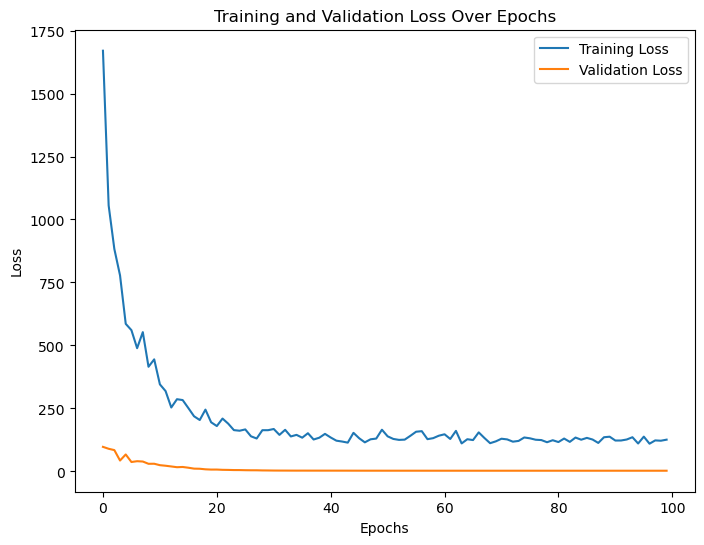

<Figure size 640x480 with 0 Axes>

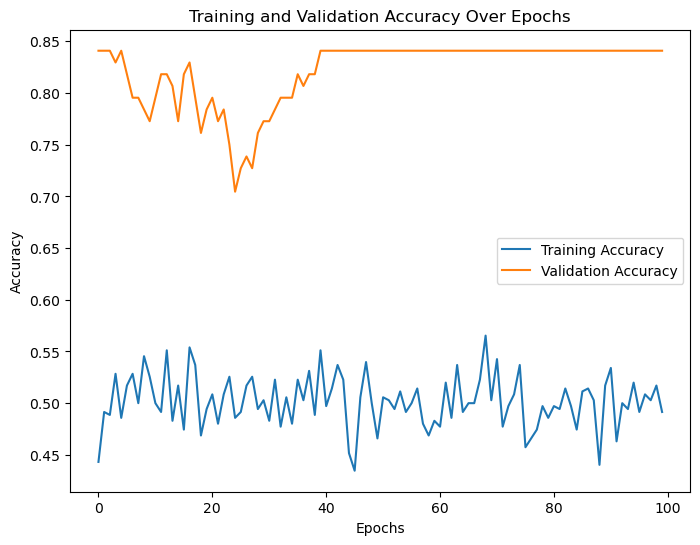

<Figure size 640x480 with 0 Axes>

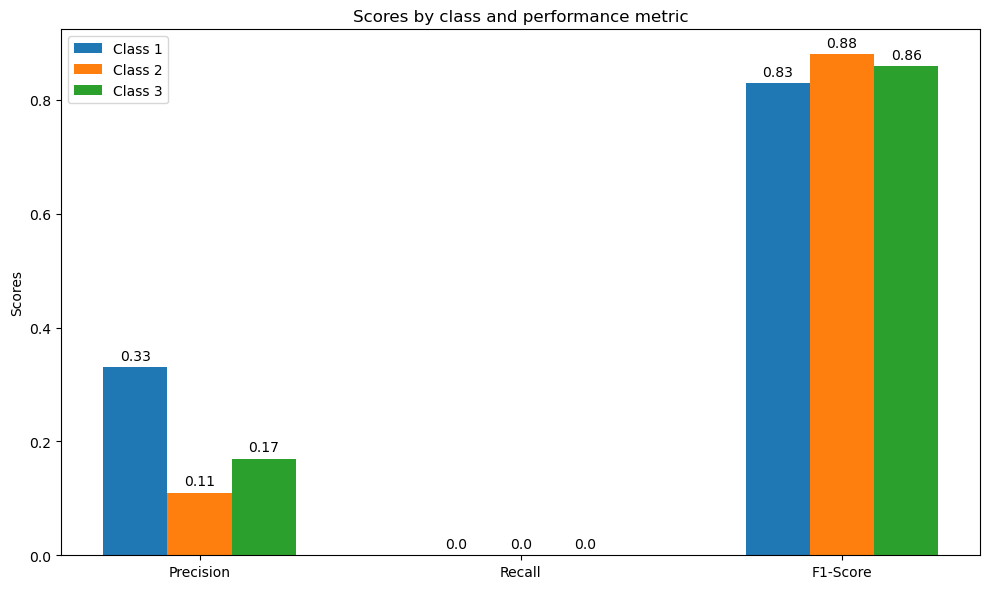

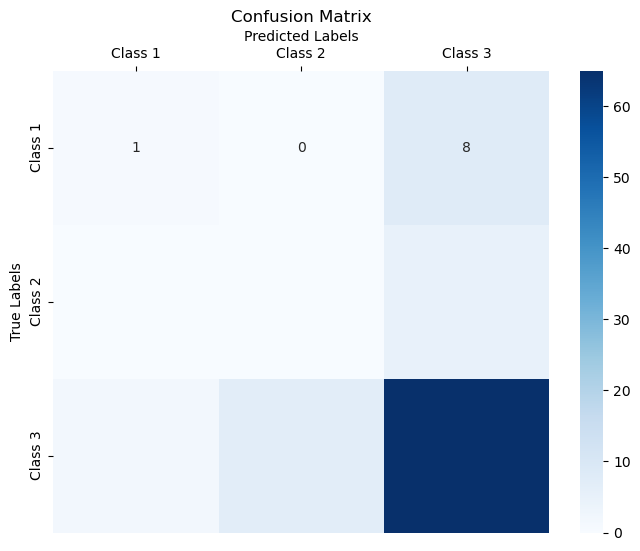

In [83]:
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)
# evaluate_model(model, X_test, y_test_encoded)

# 可视化性能指标
plot_performance(performance_data)
# 混淆矩阵的可视化
plot_confusion_matrix(confusion_matrix, class_names)

##### 8.adjust min biatch size

In [84]:
from tensorflow.keras.optimizers import SGD

def build_mlp_model_v3(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 新增的隐藏层
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))  # 维持较高的神经元数目
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer_sgd = SGD(learning_rate=0.01, momentum=0.9)         # 使用具有动量的SGD优化器
    model.compile(optimizer=optimizer_sgd,                       # 这里设置一个初始化的学习率【由原来的adam改为optimizer_sgd】
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

Training with batch size: 16


C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
22/22 - 2s - 98ms/step - accuracy: 0.0653 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 2/100
22/22 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 3/100
22/22 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 4/100
22/22 - 0s - 5ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 5/100
22/22 - 0s - 4ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 6/100
22/22 - 0s - 4ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 7/100
22/22 - 0s - 4ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 8/100
22/22 - 0s - 5ms/step - accuracy: 0.000

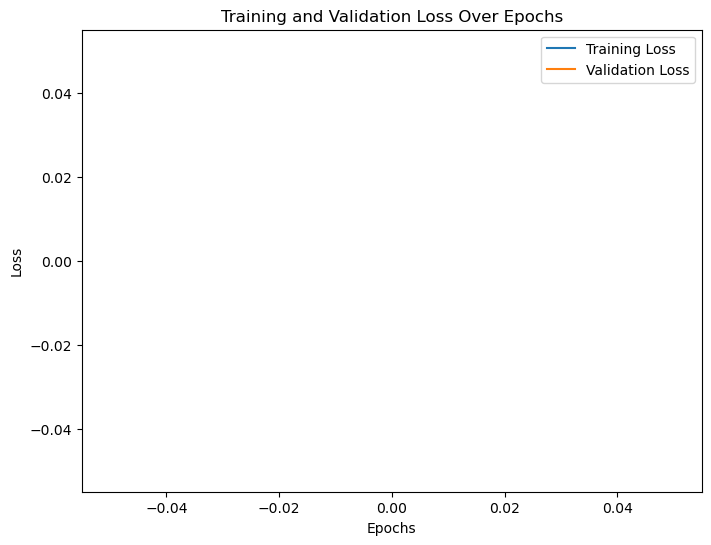

<Figure size 640x480 with 0 Axes>

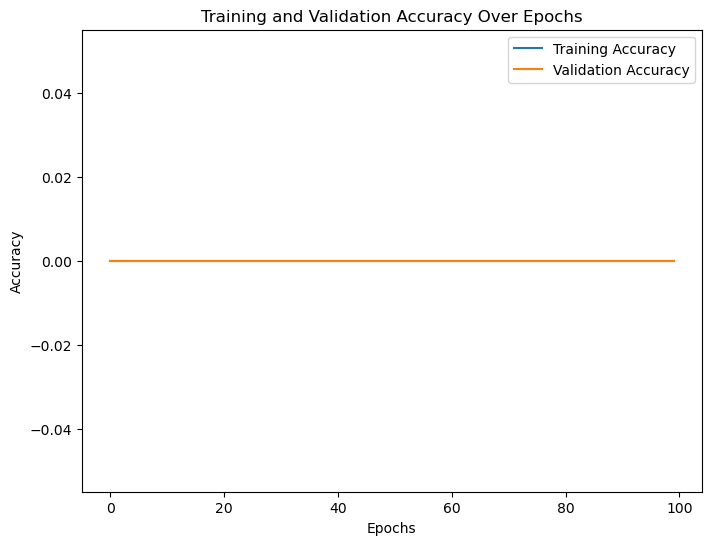

Training with batch size: 32


C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_33 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
11/11 - 2s - 172ms/step - accuracy: 0.1165 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 2/100
11/11 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 3/100
11/11 - 0s - 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 4/100
11/11 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 5/100
11/11 - 0s - 9ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 6/100
11/11 - 0s - 8ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 7/100
11/11 - 0s - 7ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 8/100
11/11 - 0s - 7ms/step - accuracy: 0.00

<Figure size 640x480 with 0 Axes>

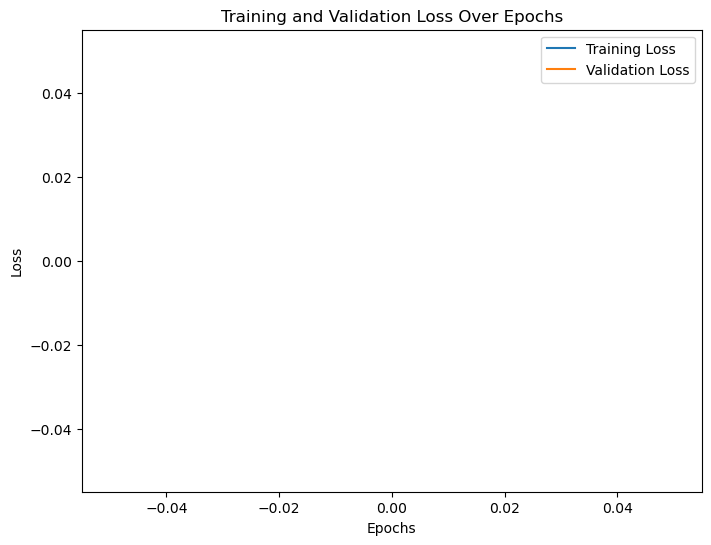

<Figure size 640x480 with 0 Axes>

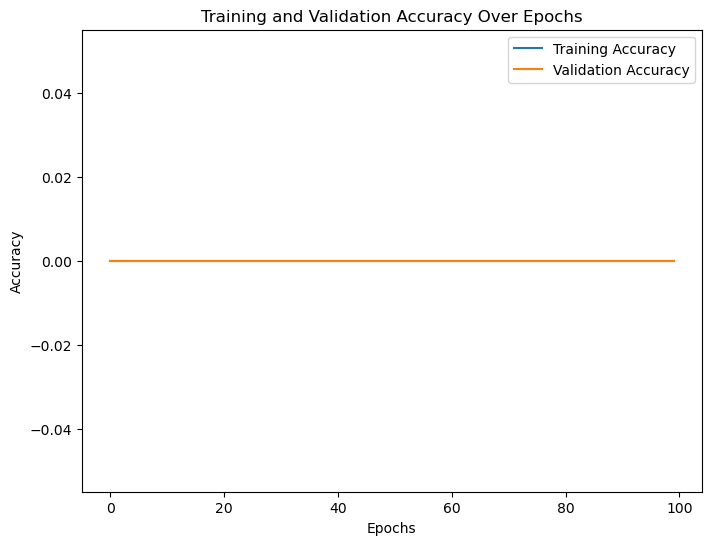

Training with batch size: 64


C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
6/6 - 2s - 376ms/step - accuracy: 0.2585 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 2/100
6/6 - 0s - 13ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 3/100
6/6 - 0s - 13ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 4/100
6/6 - 0s - 16ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 5/100
6/6 - 0s - 15ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 6/100
6/6 - 0s - 13ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 7/100
6/6 - 0s - 12ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 8/100
6/6 - 0s - 12ms/step - accuracy: 0.0000e+00 - 

<Figure size 640x480 with 0 Axes>

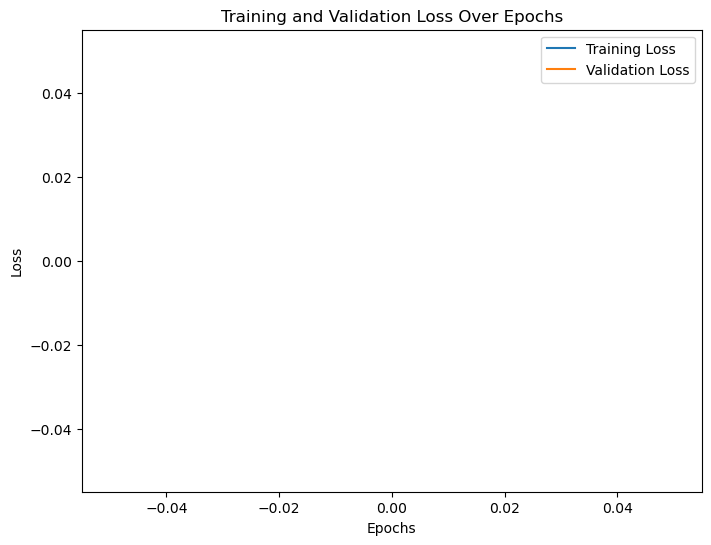

<Figure size 640x480 with 0 Axes>

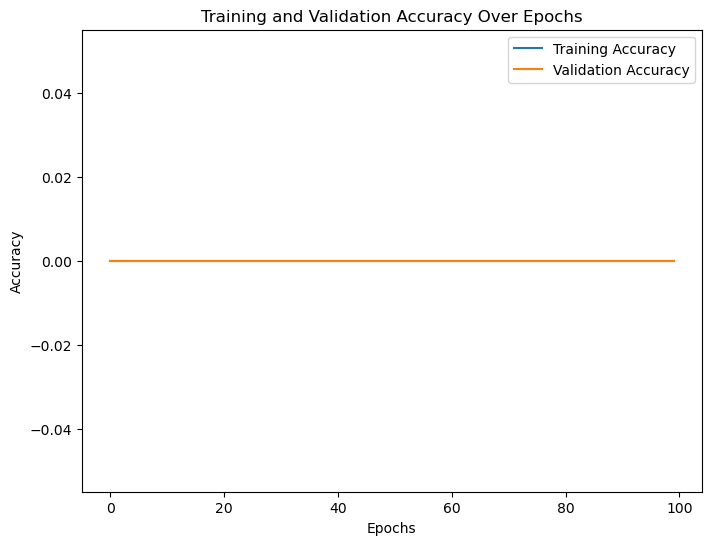

Training with batch size: 128


C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_41 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
3/3 - 2s - 687ms/step - accuracy: 0.3608 - loss: 49917137518592.0000 - val_accuracy: 0.8409 - val_loss: 1439657925884545906931719471104.0000 - learning_rate: 0.0100
Epoch 2/100
3/3 - 0s - 25ms/step - accuracy: 0.3438 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 3/100
3/3 - 0s - 24ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 4/100
3/3 - 0s - 23ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 5/100
3/3 - 0s - 22ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 6/100
3/3 - 0s - 24ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0100
Epoch 7/100
3/3 - 0s - 25ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan - learning_rate: 0.0020
Epoch 8/100
3/3 -

<Figure size 640x480 with 0 Axes>

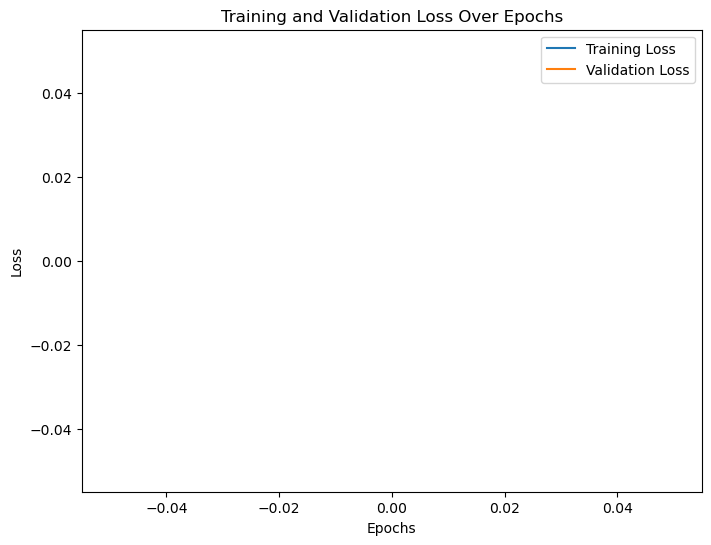

<Figure size 640x480 with 0 Axes>

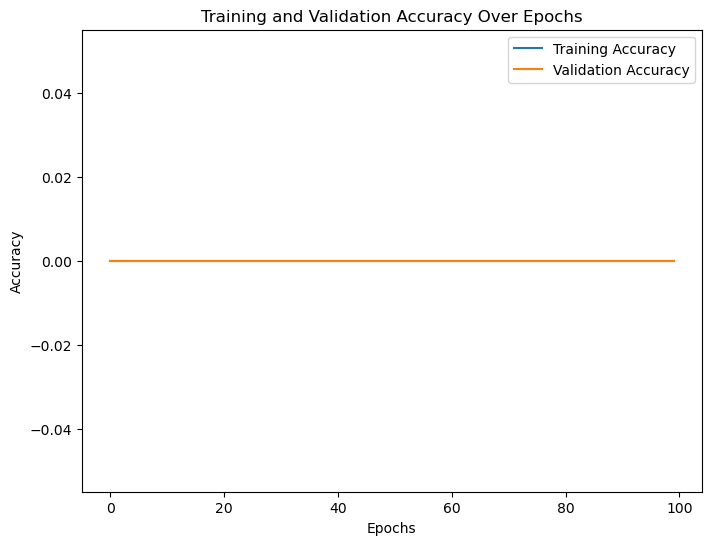

<Figure size 640x480 with 0 Axes>

In [85]:
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

# 设置不同的批量大小进行实验
batch_sizes = [16, 32, 64, 128]

for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    # 重新构建模型（如果需要保持模型结构不变）
    # 获取输入的维度（特征数量）
    input_shape = X_train.shape[1]
    
    # 确定类别的数量
    num_classes = y_train.nunique()
    
    # 因为我们正在做分类任务，所以我们需要对标签进行独热编码
    y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)
    
    # 建立模型
    model = build_mlp_model_v3(input_shape, num_classes=4)

    # 检查模型的结构（适用于Keras模型）
    model.summary()
    # model = build_mlp_model_v3(input_shape=X_train.shape[1], num_classes=num_classes)

    # # 编译模型
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # 设置学习率调整策略
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    
    # 训练模型
    history = model.fit(
        X_train, y_train_encoded,
        epochs=100,  # 或根据需要调整epochs的数量
        batch_size=batch_size,
        validation_data=(X_test, y_test_encoded),
        callbacks=[reduce_lr],
        verbose=2
    )
    model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)
    # 调用绘图函数
    plot_loss(history)  # 传入训练历史记录对象
    plot_accuracy(history)
    # evaluate_model(model, X_test, y_test_encoded)
    # 可以在这里评估模型或保存模型结果
    # evaluate_model(model, X_test, y_test_encoded)
    # model.save(f'results/model_batch_size_{batch_size}.h5')


In [93]:
from tensorflow.keras.optimizers import SGD

def build_small_batch_sgd_model(input_shape, num_classes):
    model = Sequential()
    model.add(Dense(256, input_shape=(input_shape,), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))                                     # 新增的隐藏层
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))                                     # 维持较高的神经元数目
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    optimizer_sgd = SGD(learning_rate=0.001, momentum=0.9, clipnorm=1.0)         # 使用具有动量的SGD优化器[减小学习率]  [使用梯度裁剪：在优化器中使用梯度裁剪。]
    model.compile(optimizer=optimizer_sgd,                                          # 这里设置一个初始化的学习率【由原来的adam改为optimizer_sgd】
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 - 2s - 6ms/step - accuracy: 0.0312 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 9/100
352/352 - 1s - 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.000

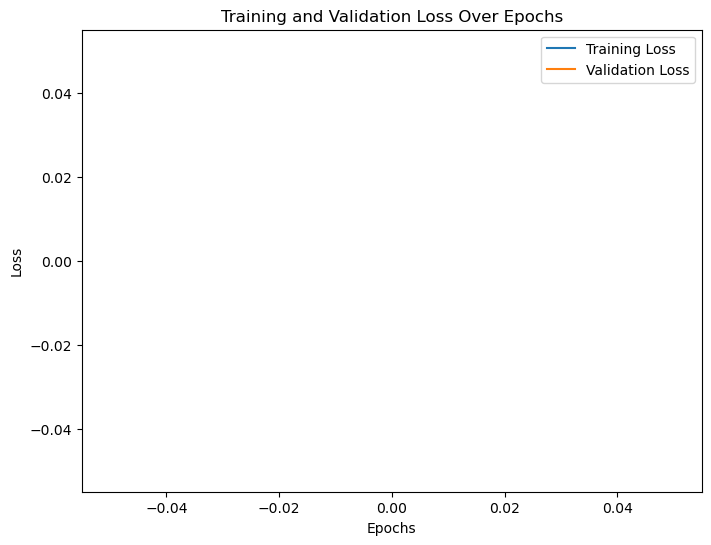

<Figure size 640x480 with 0 Axes>

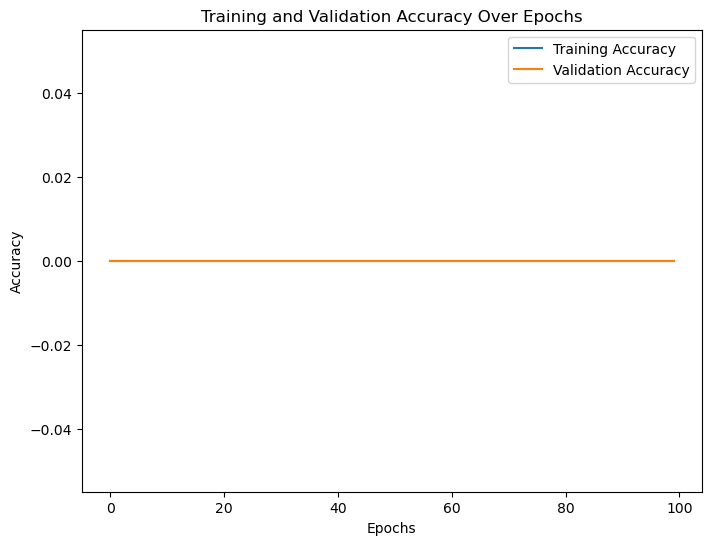

<Figure size 640x480 with 0 Axes>

In [87]:
# 训练模型，使用小批量大小
batch_size = 1  # 设置批量大小为1
model = build_small_batch_sgd_model(input_shape=X_train.shape[1], num_classes=4)
model.summary()
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=batch_size,
                    validation_data=(X_test, y_test_encoded), verbose=2)
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)

#### debug the model

In [88]:
# 确认数据维度是否正确：
print("Training set shape:", X_train.shape, y_train_encoded.shape)
print("Test set shape:", X_test.shape, y_test_encoded.shape)

Training set shape: (352, 7) (352, 4)
Test set shape: (88, 7) (88, 4)


In [89]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])   # 检查模型是否正确编译：

In [90]:
history = model.fit(
    X_train, y_train_encoded,
    epochs=100,
    batch_size=1,
    validation_data=(X_test, y_test_encoded),
    verbose=1  # 设置为1以便查看每个epoch的输出
)

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss: nan - val_accuracy: 0.0000e+00 - val_loss: nan
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0000e+00 - loss:

##### 调节过后

C:\Users\Alienware\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_49 (Dense)                     │ (None, 256)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_36 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_37 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_38 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51,972 (203.02 KB)

 Trainable params: 51,972 (203.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
352/352 - 3s - 8ms/step - accuracy: 0.3920 - loss: 1293.2073 - val_accuracy: 0.8409 - val_loss: 131.9911
Epoch 2/100
352/352 - 1s - 2ms/step - accuracy: 0.5114 - loss: 810.5934 - val_accuracy: 0.8409 - val_loss: 79.1352
Epoch 3/100
352/352 - 1s - 2ms/step - accuracy: 0.5256 - loss: 621.3972 - val_accuracy: 0.8409 - val_loss: 76.3358
Epoch 4/100
352/352 - 1s - 2ms/step - accuracy: 0.4915 - loss: 533.8150 - val_accuracy: 0.7614 - val_loss: 35.9872
Epoch 5/100
352/352 - 1s - 2ms/step - accuracy: 0.5398 - loss: 346.1432 - val_accuracy: 0.5568 - val_loss: 27.9879
Epoch 6/100
352/352 - 1s - 2ms/step - accuracy: 0.5170 - loss: 303.4636 - val_accuracy: 0.8409 - val_loss: 15.3207
Epoch 7/100
352/352 - 1s - 2ms/step - accuracy: 0.5284 - loss: 266.1240 - val_accuracy: 0.4432 - val_loss: 22.1393
Epoch 8/100
352/352 - 1s - 2ms/step - accuracy: 0.5227 - loss: 235.4908 - val_accuracy: 0.6818 - val_loss: 11.6602
Epoch 9/100
352/352 - 1s - 2ms/step - accuracy: 0.5341 - loss: 183.8062 - val_

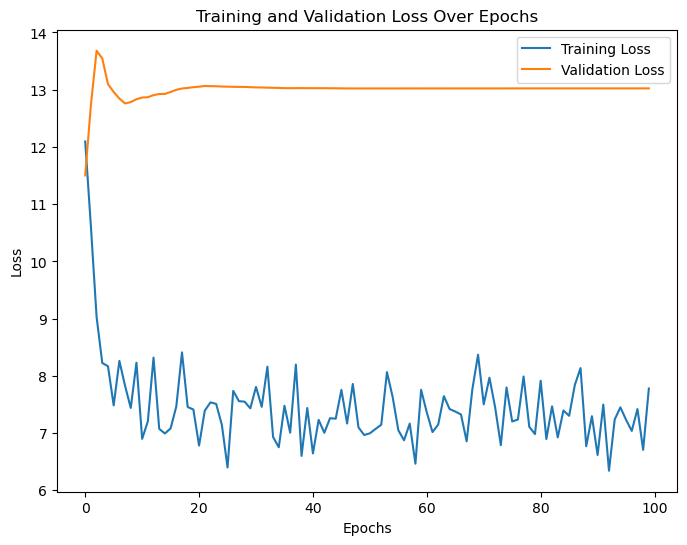

<Figure size 640x480 with 0 Axes>

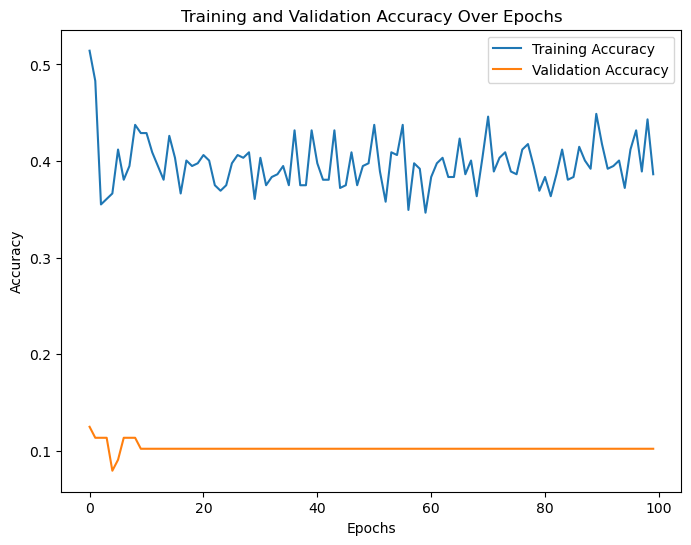

<Figure size 640x480 with 0 Axes>

In [94]:
# 训练模型，使用小批量大小
batch_size = 1  # 设置批量大小为1
model = build_small_batch_sgd_model(input_shape=X_train.shape[1], num_classes=4)
model.summary()
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=batch_size,
                    validation_data=(X_test, y_test_encoded), verbose=2)
model, history = train_model(model, X_train, y_train_encoded, X_test, y_test_encoded, epochs, batch_size)
# 调用绘图函数
plot_loss(history)  # 传入训练历史记录对象
plot_accuracy(history)